In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('games.csv', index_col=0)
df.head()

,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
gameId,,,,,,,,,,,,,,,,,,,,,
3326086514,1504279457970,1949,9,1,2,1,1,1,1,2,...,5,0,0,1,1,114,67,43,16,51
3229566029,1497848803862,1851,9,1,1,1,1,0,1,1,...,2,0,0,0,0,11,67,238,51,420
3327363504,1504360103310,1493,9,1,2,1,1,1,2,0,...,2,0,0,1,0,157,238,121,57,28
3326856598,1504348503996,1758,9,1,1,1,1,1,1,0,...,0,0,0,0,0,164,18,141,40,51
3330080762,1504554410899,2094,9,1,2,1,1,1,1,0,...,3,0,0,1,0,86,11,201,122,18


In [2]:
print(df.columns)

Index(['creationTime', 'gameDuration', 'seasonId', 'winner', 'firstBlood',
       'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon',
       'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2',
       't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id',
       't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1',
       't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2',
       't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4',
       't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills',

In [3]:
min_creation_time = df['creationTime'].min()
max_creation_time = df['creationTime'].max()

print(min_creation_time, max_creation_time)

1496891694922 1504707332198


Thu Jun 08 2017 03:14:54 GMT+0000

Wed Sep 06 2017 14:15:32 GMT+0000

In [4]:
time_barons = df[['gameDuration']]
time_barons['barons_total'] = df['t1_baronKills'] + df['t2_baronKills']
time_barons.head()

C:\Users\janny\AppData\Local\Temp\ipykernel_16052\1981443884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_barons['barons_total'] = df['t1_baronKills'] + df['t2_baronKills']


,gameDuration,barons_total
gameId,,
3326086514,1949,2
3229566029,1851,0
3327363504,1493,1
3326856598,1758,1
3330080762,2094,1


In [5]:
time_barons_grouped = time_barons.groupby(['barons_total'])
time_barons_grouped.mean()

,gameDuration
barons_total,
0,1485.335571
1,1931.497586
2,2352.117936
3,2796.302789
4,3238.857143
5,3740.600000


In [6]:
champ_df = pd.read_json('./champion_info.json', orient='split')
champ_df = champ_df.transpose()
champ_df.head()

,title,id,key,name
1,the Dark Child,1,Annie,Annie
2,the Berserker,2,Olaf,Olaf
3,the Colossus,3,Galio,Galio
4,the Card Master,4,TwistedFate,Twisted Fate
5,the Seneschal of Demacia,5,XinZhao,Xin Zhao


<AxesSubplot: >

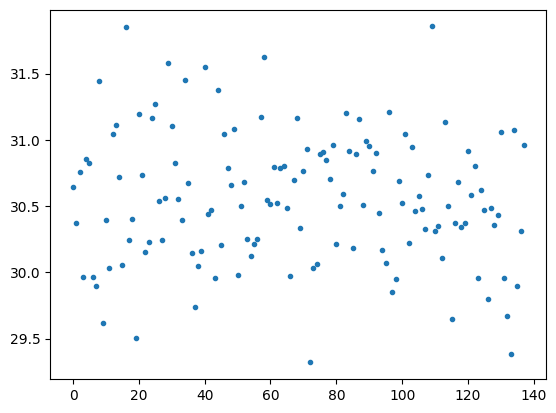

In [7]:
champ_game_time = df[[
  'gameDuration',
  't1_champ1id',
  't1_champ2id',
  't1_champ3id',
  't1_champ4id',
  't1_champ5id',
  't2_champ1id',
  't2_champ2id',
  't2_champ3id',
  't2_champ4id',
  't2_champ5id'
]]

l = []

for i, j in champ_df.iterrows():
  champ_id = j['id']

  champ_only = champ_game_time[
    (champ_game_time['t1_champ1id'] == champ_id) |
    (champ_game_time['t1_champ2id'] == champ_id) |
    (champ_game_time['t1_champ3id'] == champ_id) |
    (champ_game_time['t1_champ4id'] == champ_id) |
    (champ_game_time['t1_champ5id'] == champ_id) |
    (champ_game_time['t2_champ1id'] == champ_id) |
    (champ_game_time['t2_champ2id'] == champ_id) |
    (champ_game_time['t2_champ3id'] == champ_id) |
    (champ_game_time['t2_champ4id'] == champ_id) |
    (champ_game_time['t2_champ5id'] == champ_id)
  ]
  champ_name = j['name']
  num_rows = champ_only.shape[0]
  champ_mean_game_time = champ_only['gameDuration'].mean()
  l.append([champ_id, champ_name, num_rows, champ_mean_game_time / 60])

champ_time_df = pd.DataFrame(l, columns=['champId', 'name', 'numGames', 'gameDurationMean'])
champ_time_df.head()

champ_time_df['gameDurationMean'].plot(style='.')

In [8]:
champ_time_df.sort_values('gameDurationMean', ascending=False)

,champId,name,numGames,gameDurationMean
109,143,Zyra,2355,31.856384
16,17,Teemo,4144,31.849718
58,63,Brand,3876,31.624002
29,30,Karthus,1007,31.578021
40,41,Gangplank,4204,31.549076
...,...,...,...,...
115,164,Camille,1886,29.644406
9,10,Kayle,2003,29.617923
19,20,Nunu,1308,29.503746
133,429,Kalista,3572,29.380688
